# Gradient descent

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('bmh')

## In general
$\vec{\theta} := \vec{\theta} - \alpha \nabla J( \vec{\theta} )$, <br>
where $J$ is the cost function and $\alpha$ is the learning rate.

In [3]:
def gradient_descent(gradient, start, learn_rate, tolerance=1e-6, n_iter=100):
    theta = start
    for _ in range(n_iter):
        diff = -learn_rate * gradient(theta)
        if np.all(np.abs(diff) <= tolerance):
            break
        theta += diff
    return theta

### 1D Example 
If the cost function $J( \theta ) = \theta^2$, then $ \nabla J = 2 \theta $. Let's start at 10.0. <br>
Let's look at this function for a small, good and large learning rate.

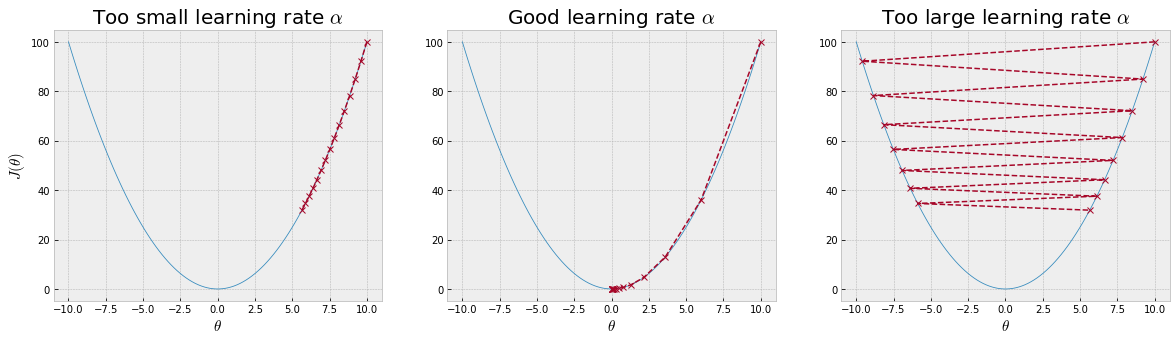

In [72]:
# Setup
theta        = np.linspace(-guess, guess, 100)
J            = np.array(theta**2)
gradient     = lambda theta: 2 * theta
guess        = 10.0
small_alpha  = 0.02
good_alpha   = 0.2
large_alpha  = 0.98
small_thetas = [guess]
good_thetas  = [guess]
large_thetas = [guess]

# Run gradient descent for different iteration limits
for i in range(1, 15):
    small_theta = gradient_descent(gradient, guess, small_alpha, n_iter=i)
    good_theta = gradient_descent(gradient, guess, good_alpha, n_iter=i)
    large_theta = gradient_descent(gradient, guess, large_alpha, n_iter=i)
    small_thetas.append(small_theta)
    good_thetas.append(good_theta)
    large_thetas.append(large_theta)

# Convert to arrays for convenience
small_thetas = np.array(small_thetas)
good_thetas = np.array(good_thetas)
large_thetas = np.array(large_thetas)

# Plotting
fig = plt.figure(1, figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(theta, J, linewidth=0.8)
plt.plot(small_thetas, small_thetas**2, linestyle="--", marker="x", linewidth=1.5)
plt.xlabel(r"$\theta$", fontsize=15)
plt.ylabel(r"$J(\theta)$", fontsize=15)
plt.title(r"Too small learning rate $\alpha$", fontsize=20)

plt.subplot(1,3,2)
plt.plot(theta, J, linewidth=0.8)
plt.plot(good_thetas, good_thetas**2, linestyle="--", marker="x", linewidth=1.5)
plt.xlabel(r"$\theta$", fontsize=15)
plt.title(r"Good learning rate $\alpha$", fontsize=20)

plt.subplot(1,3,3)
plt.plot(theta, J, linewidth=0.8)
plt.plot(large_thetas, large_thetas**2, linestyle="--", marker="x", linewidth=1.5)
plt.xlabel(r"$\theta$", fontsize=15)
plt.title(r"Too large learning rate $\alpha$", fontsize=20)
plt.show()

All examples will converge, but small and large $\alpha$ here will require a large number of iterations. For $\alpha > 1$, gradient descent will diverge here. 